<a href="https://colab.research.google.com/github/Anagha-dsa/Data.science/blob/main/Anagha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Case study on unsupervised learning**
Try out different clustering models in the given dataset. Find the optimum
number of clusters in each model and create the model with optimum number of
clusters. Also learn about dB scan clustering and implement it

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

Loading dataset

In [95]:
# loading data
df = pd.read_csv('/content/Wine_clust  (1).csv')

In [96]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Data Analysis

In [97]:
# no of rows and columns
df.shape

(178, 13)

In [98]:
# check for no: of missing values in each column
df.isna().sum()

,0
Alcohol,0
Malic_Acid,0
Ash,0
Ash_Alcanity,0
Magnesium,0
Total_Phenols,0
Flavanoids,0
Nonflavanoid_Phenols,0
Proanthocyanins,0
Color_Intensity,0


In [99]:
# statistical information
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [100]:
# drops duplicates
df = df.drop_duplicates()

In [101]:
df.shape

(178, 13)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


Correlation Matrix

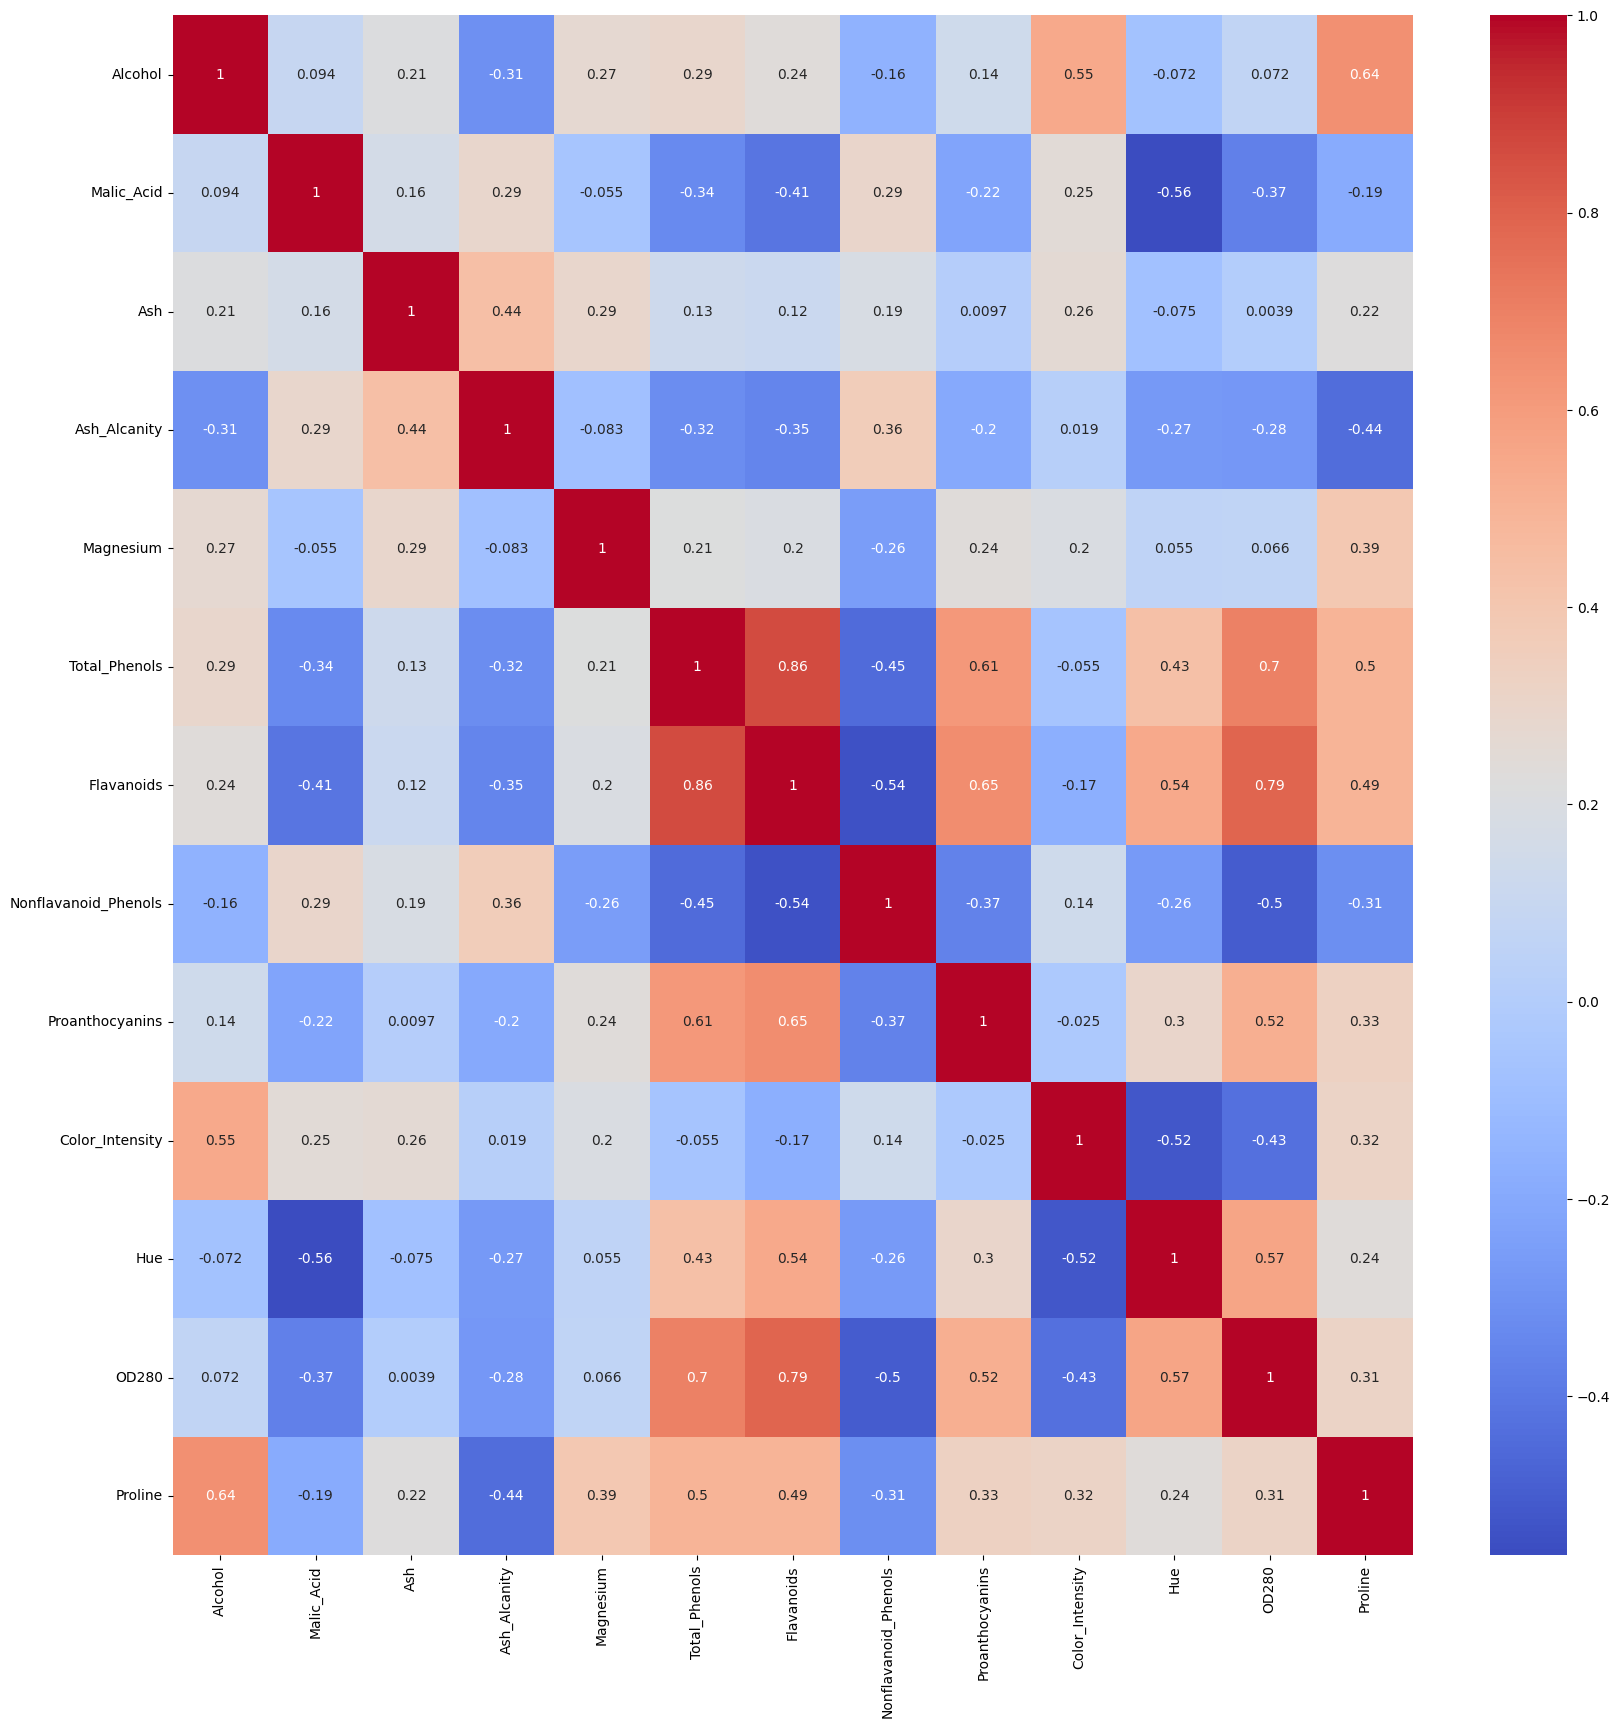

In [103]:
plt.figure(figsize= (20,20))
sns.heatmap(df.corr(), annot = True, cmap= "coolwarm")
plt.show()

Data Visualization

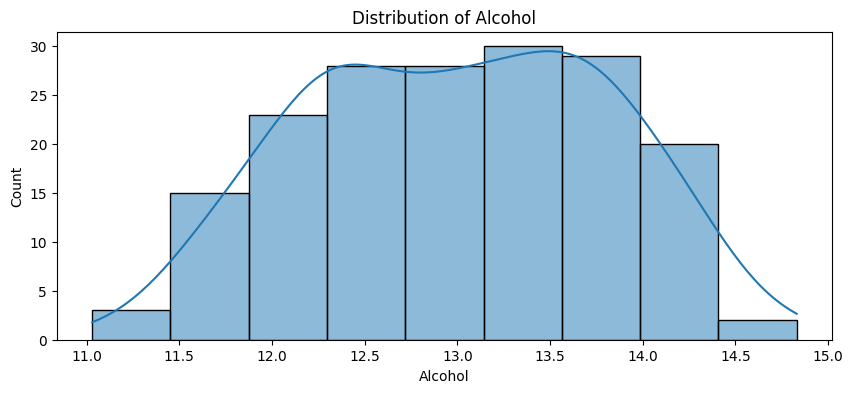

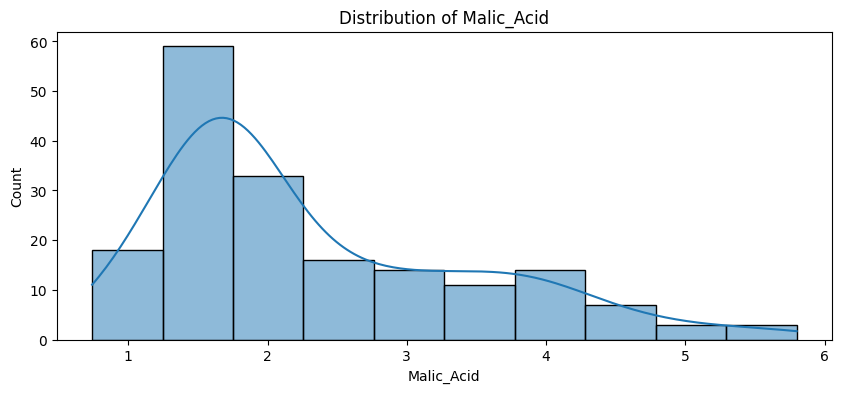

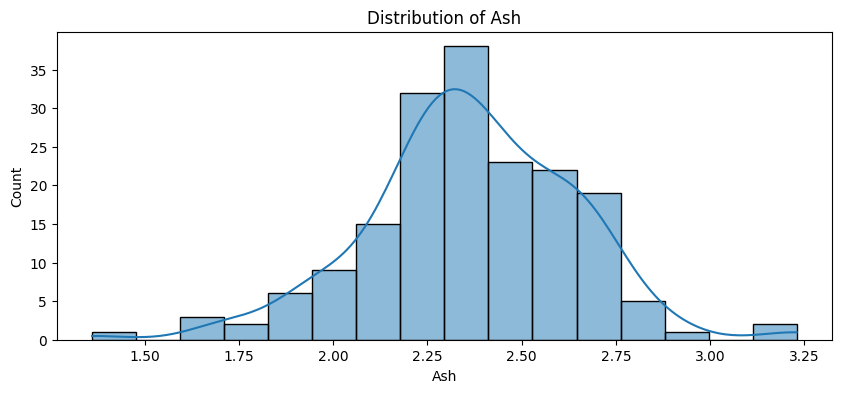

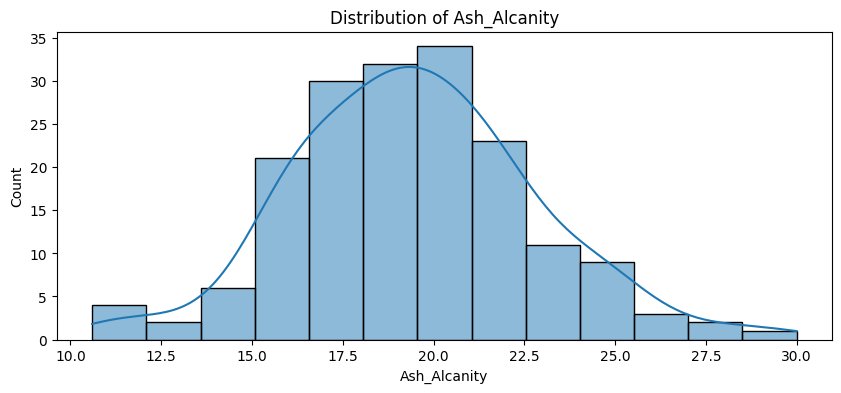

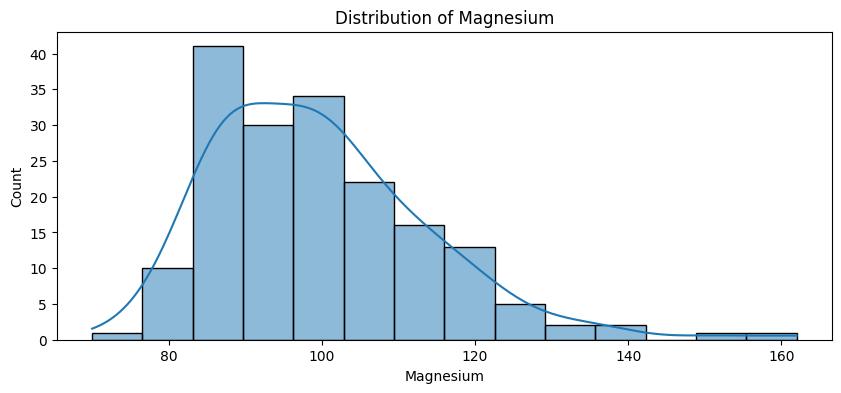

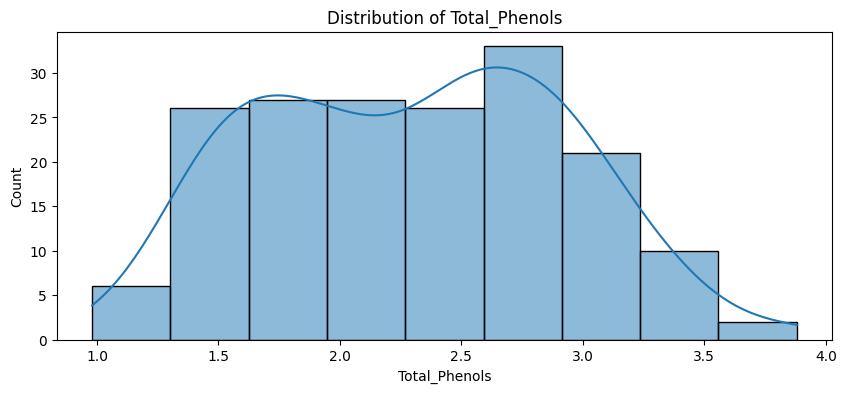

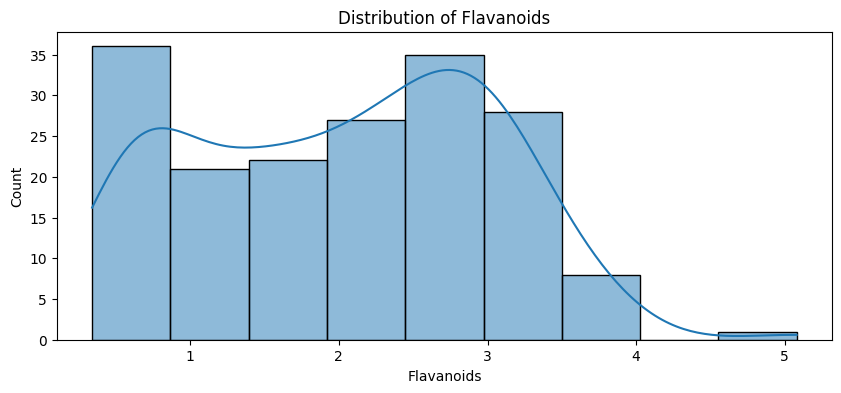

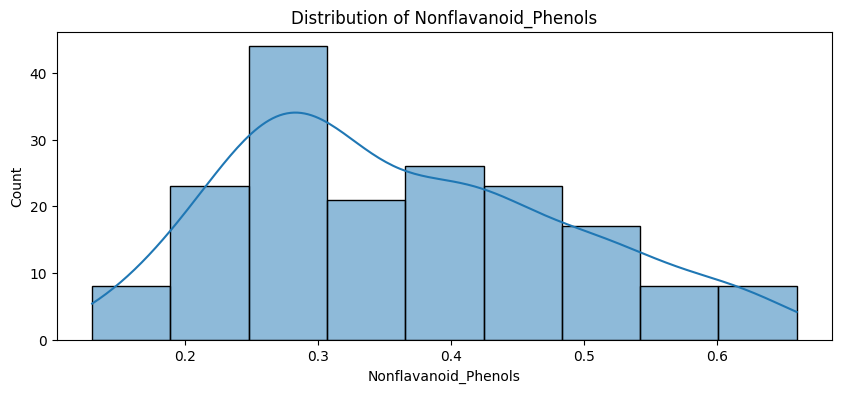

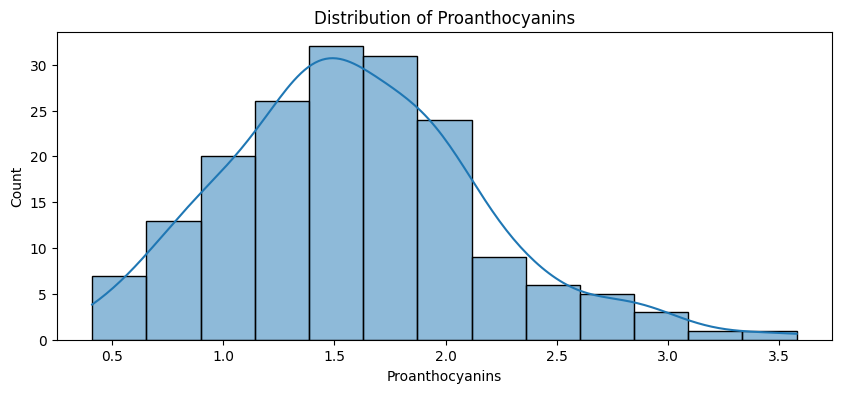

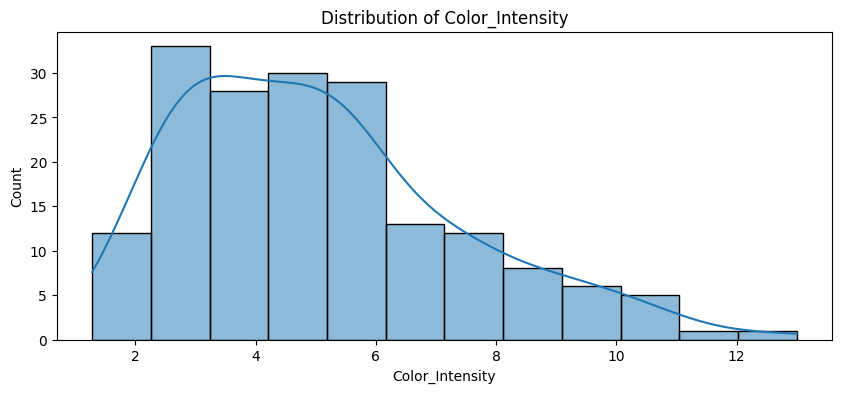

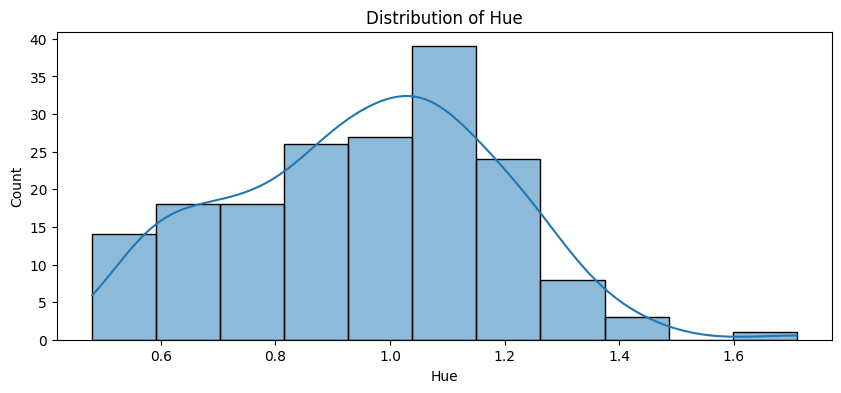

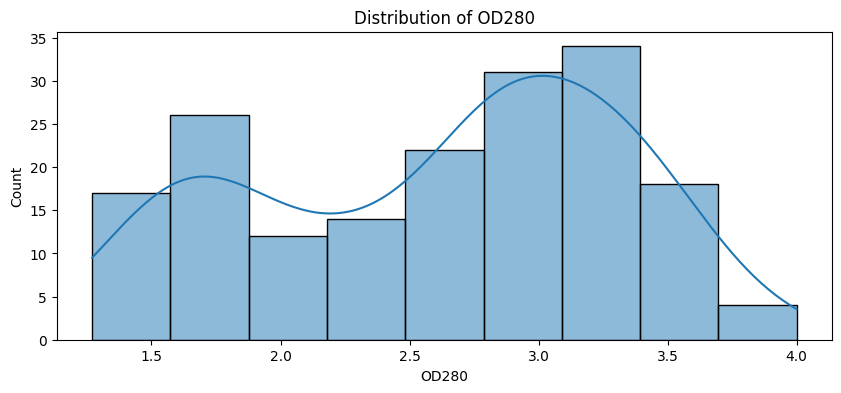

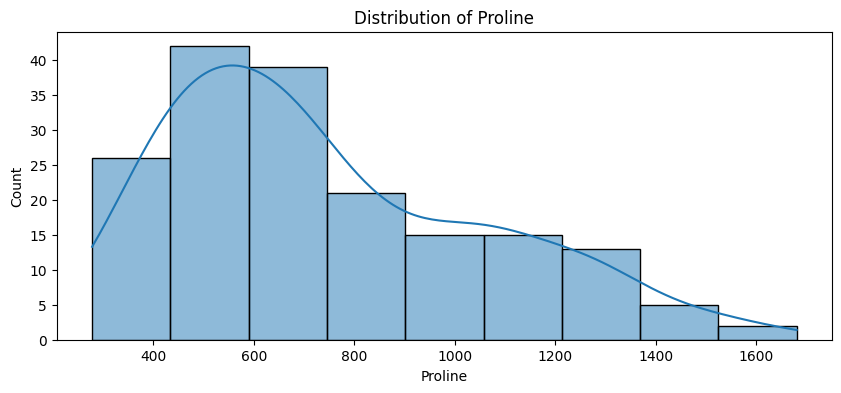

In [104]:
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

In [105]:
# Apply StandardScaler to numerical features
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])
df.head()


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


Applying PCA (Principal Component Analysis)

In [106]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df = pd.DataFrame(pca.fit_transform(df), columns=['PC1', 'PC2'])
df.head()

,PC1,PC2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


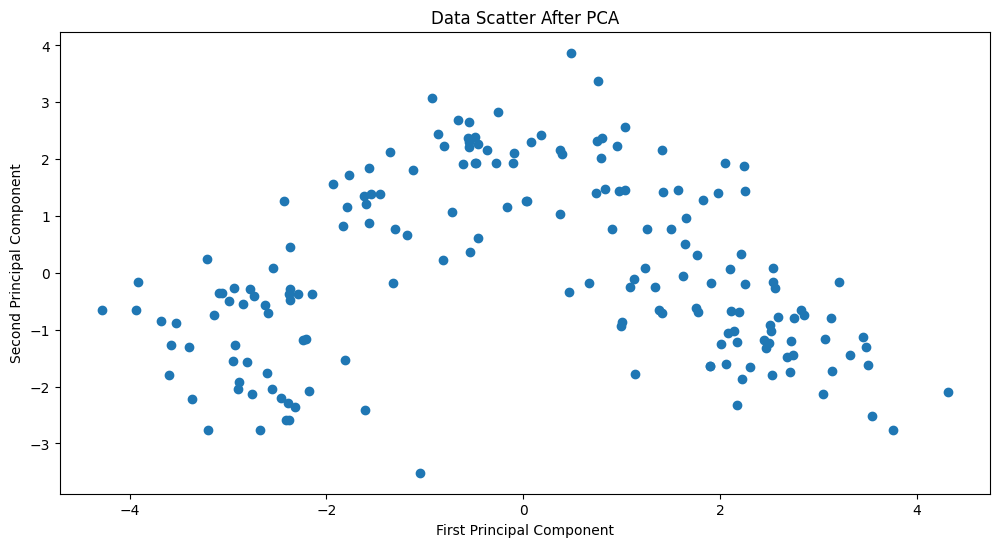

In [107]:
plt.scatter(df['PC1'], df['PC2'])
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title(f"Data Scatter After PCA")
plt.show()

# K Means

In [108]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42,n_init='auto')
  kmeans.fit(df)
  wcss.append(kmeans.inertia_)

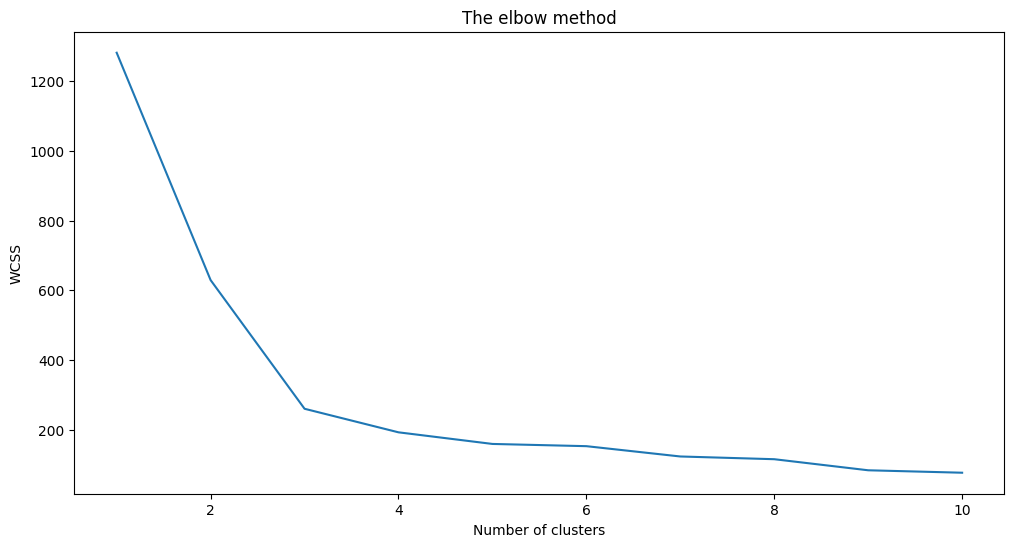

In [109]:
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


Optimum number of clusters = 3

In [110]:
 kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42,n_init='auto')

 y_pred=kmeans.fit_predict(df)

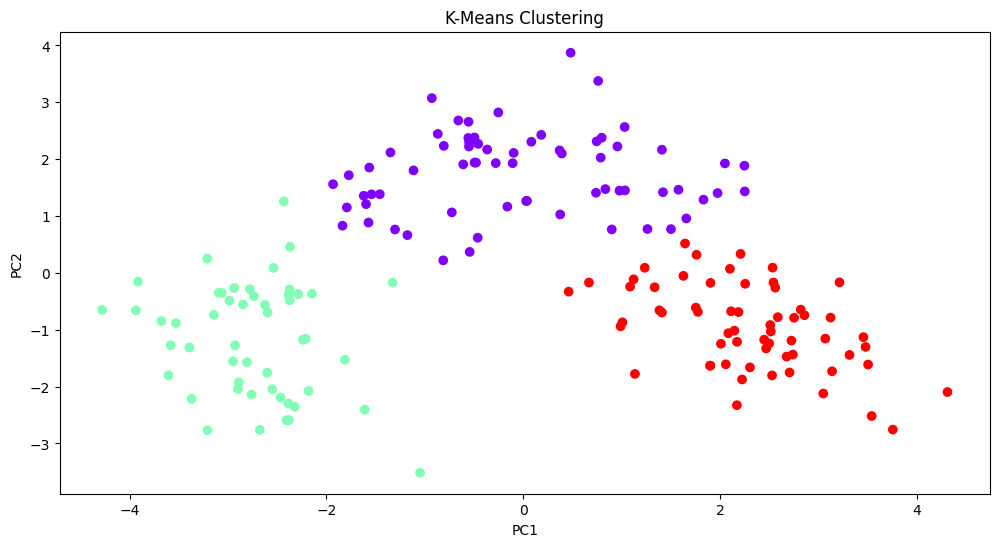

In [111]:
plt.scatter(df['PC1'], df['PC2'], c=kmeans.labels_, cmap='rainbow')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means Clustering')
plt.show()

# Hierarchial Agglomerative clustering

In [112]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster

In [113]:
mergings= linkage(df,method='ward')

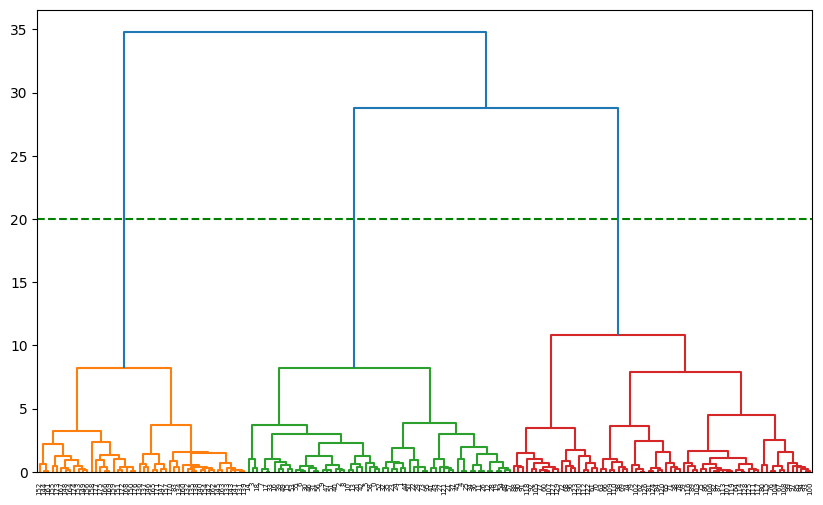

In [114]:
plt.figure(figsize=(10,6))
plt.axhline(20,color='green',linestyle='--')
dendrogram(mergings)
plt.show()

In [115]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
y_hc = hc.fit(df)

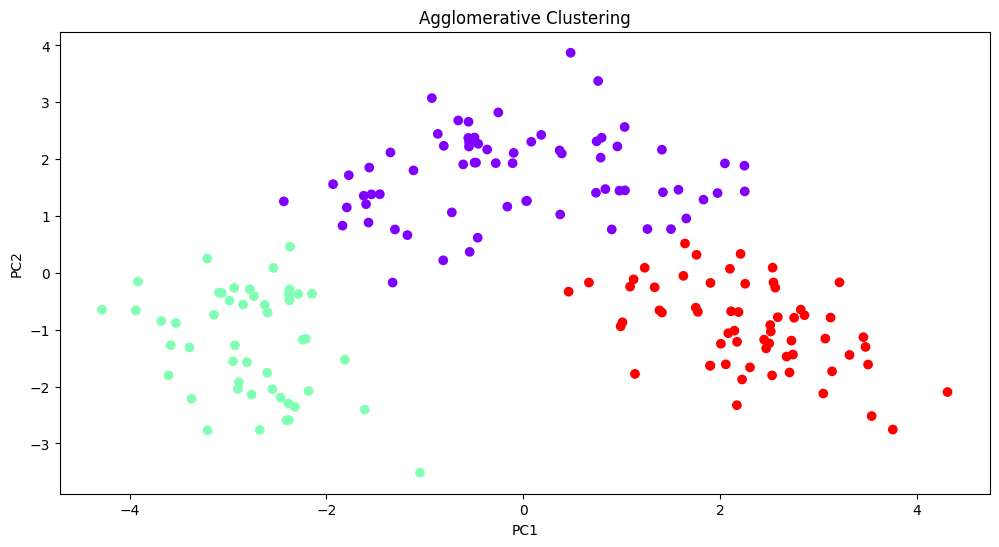

In [116]:
plt.scatter(df['PC1'], df['PC2'], c = hc.labels_, cmap ='rainbow')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title(f"Agglomerative Clustering")
plt.show()

# DB scan clustering

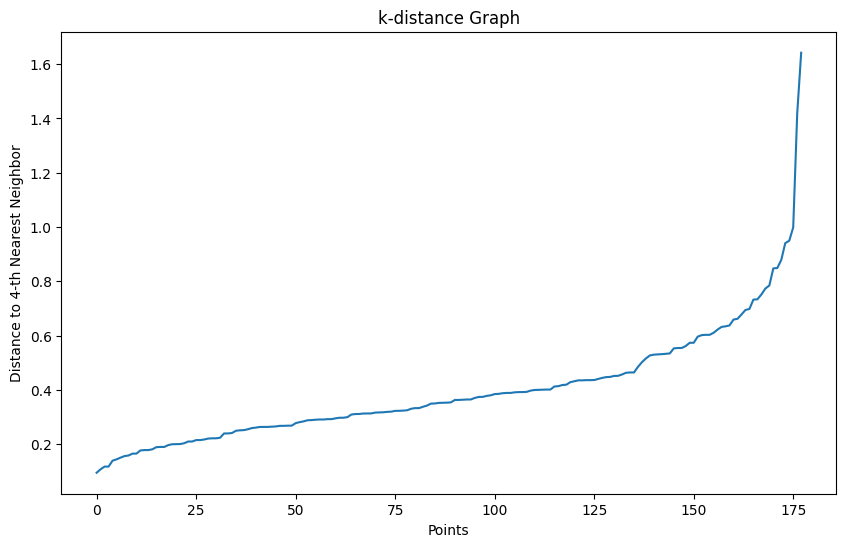

In [117]:
import numpy as np
from sklearn.neighbors import NearestNeighbors

# Choose the value of k as min_samples
k = 4
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(df)
distances, indices = neighbors_fit.kneighbors(df)

# Sort and plot the distances to find the "elbow"
distances = np.sort(distances[:, k-1], axis=0)
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('k-distance Graph')
plt.xlabel('Points')
plt.ylabel(f'Distance to {k}-th Nearest Neighbor')
plt.show()

In [118]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.7, min_samples=10).fit(df)

In [119]:
db_clusters = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)  #label=-1 for noise
db_noise = list(db.labels_).count(-1)

print(f"Estimated number of clusters: {db_clusters}")
print(f"Estimated number of noise points: {db_noise}")

Estimated number of clusters: 4
Estimated number of noise points: 20


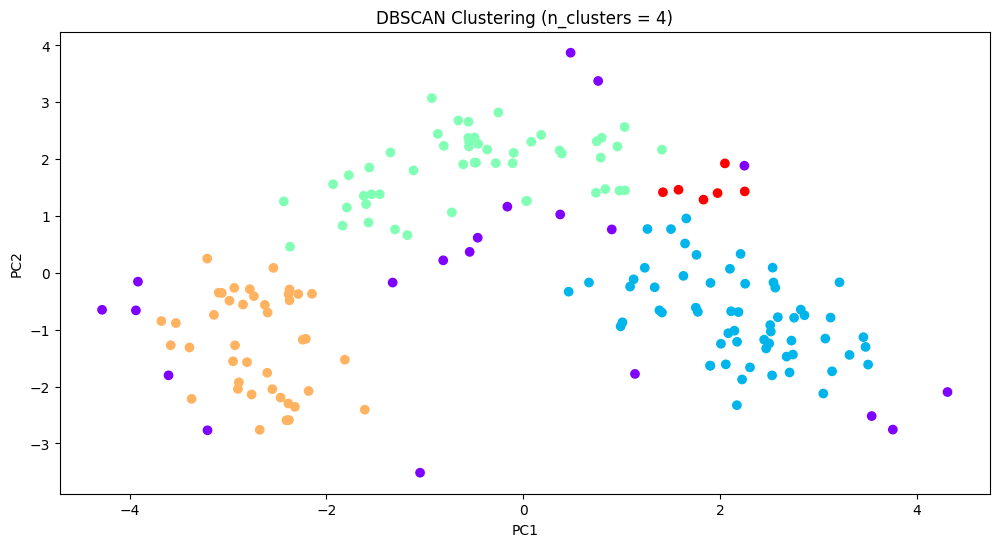

In [120]:
plt.scatter(df['PC1'], df['PC2'], c = db.labels_, cmap ='rainbow')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title(f"DBSCAN Clustering (n_clusters = {db_clusters})")
plt.show()